# Laboratorio 9 Deep Learning Red Neuronal Convolucional
## Profesora: Adriana Collaguazo Jaramillo
## Curso: Aprendizaje automático y minería de datos

En este taller se construye una Red Neuronal Convolucional (CNN) liviana para clasificar dígitos del dataset MNIST. Se mostrará cómo:

* Preprocesar los datos.

* Definir y entrenar un modelo CNN simplificado para reducir tiempos de cómputo.

* Visualizar de forma gráfica la evolución de las métricas de entrenamiento y validación.

* Evaluar el modelo con métricas de rendimiento (precisión, recall, F1-score y AUC-ROC).

* Comparar el comportamiento del modelo con y sin técnicas de regularización para analizar el overfitting.

* Aplicar validación cruzada y realizar una búsqueda sencilla de hiperparámetros.



# 1. Configuración e Importación de Librerías

In [1]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.preprocessing import label_binarize

# 2. Cargar y Preprocesar el Dataset MNIST

In [2]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar las imágenes (convertir valores a [0,1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Agregar la dimensión de canal (necesario para CNN)
x_train = np.expand_dims(x_train, -1)  # Forma: (num_samples, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 3. Definir la Arquitectura de la CNN Liviana
En este caso se utiliza un modelo con una sola capa convolucional de 16 filtros y una capa densa de 64 neuronas. Se incluye regularización (Dropout y L2) que se podrá ajustar en la búsqueda de hiperparámetros.

In [3]:
def create_lighter_model(dropout_rate=0.25, l2_reg=0.001):
    model = models.Sequential()
    # Capa convolucional: 16 filtros, tamaño (3,3)
    model.add(layers.Conv2D(16, (3,3), activation='relu',
                            input_shape=(28,28,1),
                            kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(dropout_rate))

    # Aplanar y capa densa con 64 neuronas
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.Dropout(dropout_rate))

    # Capa de salida para 10 clases (dígitos 0-9)
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 4. Entrenar la CNN Liviana y Visualizar Resultados
Entrenamos el modelo utilizando el 80% de los datos de entrenamiento y reservamos el 20% para validación, mostrando de forma gráfica la evolución de la precisión y la pérdida.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.7683 - loss: 0.8741 - val_accuracy: 0.9594 - val_loss: 0.2511
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9408 - loss: 0.2994 - val_accuracy: 0.9702 - val_loss: 0.2029
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.9549 - loss: 0.2509 - val_accuracy: 0.9751 - val_loss: 0.1825
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9576 - loss: 0.2300 - val_accuracy: 0.9770 - val_loss: 0.1671
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9631 - loss: 0.2101 - val_accuracy: 0.9718 - val_loss: 0.1772
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9645 - loss: 0.2031 - val_accuracy: 0.9783 - val_loss: 0.1608
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9676 - loss: 0.1924 - val_accuracy: 0.9803 - val_loss: 0.1514
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9685 - loss: 0.1885 - 

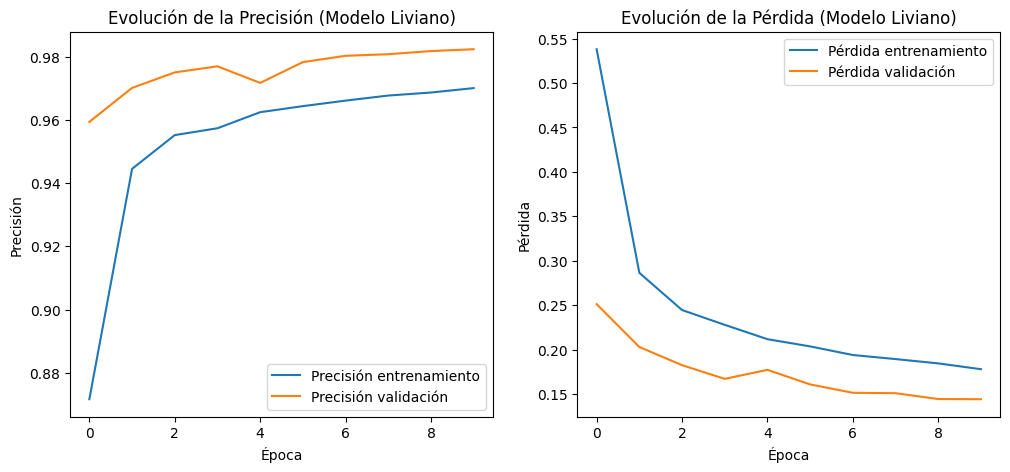

In [4]:
# Crear y entrenar el modelo liviano
lighter_model = create_lighter_model()
history_lighter = lighter_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Graficar la precisión y la pérdida en entrenamiento y validación
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_lighter.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history_lighter.history['val_accuracy'], label='Precisión validación')
plt.title('Evolución de la Precisión (Modelo Liviano)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_lighter.history['loss'], label='Pérdida entrenamiento')
plt.plot(history_lighter.history['val_loss'], label='Pérdida validación')
plt.title('Evolución de la Pérdida (Modelo Liviano)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


# 5. Evaluación del Modelo y Cálculo de Métricas de Rendimiento
Evaluamos el modelo en el conjunto de prueba, calculando métricas como precisión, recall, F1-score y AUC-ROC (para clasificación multiclase, utilizando el enfoque One-vs-Rest). También se grafica la curva ROC para una clase (por ejemplo, la clase 0).

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9757 - loss: 0.1539
Test Loss: 0.13977840542793274
Test Accuracy: 0.9804999828338623
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.96      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

AUC-ROC (multiclase): 0.999821439

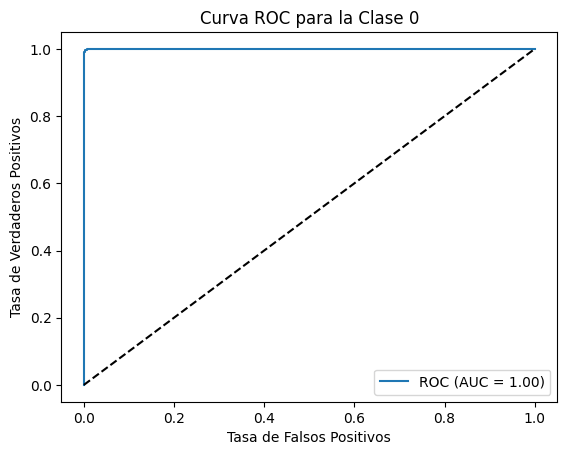

In [5]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = lighter_model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Realizar predicciones en el conjunto de prueba
y_pred_prob = lighter_model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Reporte de clasificación: precisión, recall y F1-score
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular AUC-ROC para clasificación multiclase (usando One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.arange(10))
auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
print("AUC-ROC (multiclase):", auc)

# Graficar la curva ROC para la clase 0 como ejemplo
fpr, tpr, _ = roc_curve(y_test_bin[:,0], y_pred_prob[:,0])
plt.figure()
plt.plot(fpr, tpr, label='ROC (AUC = %0.2f)' % roc_auc_score(y_test_bin[:,0], y_pred_prob[:,0]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para la Clase 0')
plt.legend(loc="lower right")
plt.show()

# 6. Análisis de Overfitting y Técnicas de Regularización
Para ver el efecto del overfitting, se entrena un modelo sin técnicas de regularización (sin Dropout y sin L2). Se comparan las curvas de precisión y pérdida entre ambos casos.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8345 - loss: 0.6184 - val_accuracy: 0.9613 - val_loss: 0.1406
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9647 - loss: 0.1226 - val_accuracy: 0.9763 - val_loss: 0.0836
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9784 - loss: 0.0758 - val_accuracy: 0.9812 - val_loss: 0.0711
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9836 - loss: 0.0567 - val_accuracy: 0.9798 - val_loss: 0.0647
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9859 - loss: 0.0461 - val_accuracy: 0.9817 - val_loss: 0.0642
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9893 - loss: 0.0365 - val_accuracy: 0.9841 - val_loss: 0.0618
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.9910 - loss: 0.0286 - val_accuracy: 0.9818 - val_loss: 0.0624
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9927 - loss: 0.0253 - 

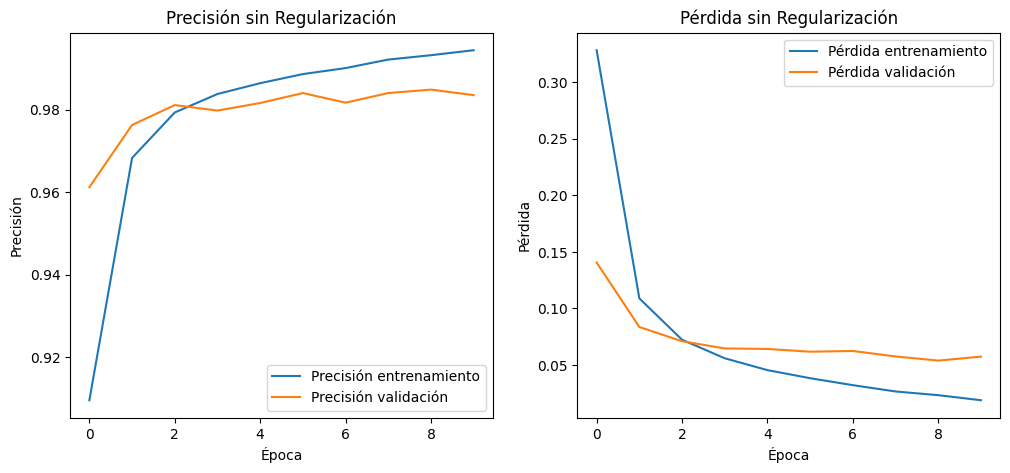

Comparando ambos modelos se observa que, sin regularización, es más probable que se produzca overfitting.


In [6]:
# Entrenar un modelo sin técnicas de regularización
model_no_reg = create_lighter_model(dropout_rate=0.0, l2_reg=0.0)
history_no_reg = model_no_reg.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Graficar las curvas de precisión y pérdida sin regularización
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_no_reg.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history_no_reg.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión sin Regularización')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_no_reg.history['loss'], label='Pérdida entrenamiento')
plt.plot(history_no_reg.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida sin Regularización')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

print("Comparando ambos modelos se observa que, sin regularización, es más probable que se produzca overfitting.")

# 7. Validación Cruzada y Optimización de Hiperparámetros
## a) Validación Cruzada
Se utiliza KFold para evaluar la estabilidad del modelo en distintas particiones del conjunto de entrenamiento.

In [7]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = []

for train_index, val_index in kf.split(x_train):
    x_train_cv, x_val_cv = x_train[train_index], x_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    model_cv = create_lighter_model()
    model_cv.fit(x_train_cv, y_train_cv, epochs=5, batch_size=128, verbose=0)
    score = model_cv.evaluate(x_val_cv, y_val_cv, verbose=0)
    cv_scores.append(score[1])  # Precisión

print("Precisión media en validación cruzada:", np.mean(cv_scores))

Precisión media en validación cruzada: 0.9713333249092102


## b) Búsqueda Sencilla de Hiperparámetros
Se realiza una búsqueda en rejilla (grid search) variando la tasa de dropout y el factor de regularización L2 para encontrar la combinación que ofrezca mayor precisión en la validación.

In [8]:
dropout_rates = [0.0, 0.25, 0.5]
l2_regs = [0.0, 0.001, 0.01]
best_score = 0
best_params = {}

for dropout_rate in dropout_rates:
    for l2_reg in l2_regs:
        model_hp = create_lighter_model(dropout_rate=dropout_rate, l2_reg=l2_reg)
        history_hp = model_hp.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=0)
        val_acc = history_hp.history['val_accuracy'][-1]
        print(f"Dropout: {dropout_rate}, L2: {l2_reg}, Precisión validación: {val_acc:.4f}")
        if val_acc > best_score:
            best_score = val_acc
            best_params = {'dropout_rate': dropout_rate, 'l2_reg': l2_reg}

print("\nMejores hiperparámetros encontrados:", best_params, "con precisión:", best_score)


Dropout: 0.0, L2: 0.0, Precisión validación: 0.9772
Dropout: 0.0, L2: 0.001, Precisión validación: 0.9729
Dropout: 0.0, L2: 0.01, Precisión validación: 0.9372
Dropout: 0.25, L2: 0.0, Precisión validación: 0.9670
Dropout: 0.25, L2: 0.001, Precisión validación: 0.9765
Dropout: 0.25, L2: 0.01, Precisión validación: 0.9538
Dropout: 0.5, L2: 0.0, Precisión validación: 0.9636
Dropout: 0.5, L2: 0.001, Precisión validación: 0.9658
Dropout: 0.5, L2: 0.01, Precisión validación: 0.9503

Mejores hiperparámetros encontrados: {'dropout_rate': 0.0, 'l2_reg': 0.0} con precisión: 0.9772499799728394


# Actividades a Realizar
## 1. Modificar la tasa de Dropout

* **Qué hacer:**

  * Ejecuta el entrenamiento del modelo usando diferentes valores de dropout, por ejemplo: 0.0 (sin dropout), 0.25 y 0.5.

  * Observa y compara las curvas de precisión y pérdida de entrenamiento y validación para identificar diferencias en el comportamiento del modelo.

  * Analiza cómo varía el overfitting (por ejemplo, si el modelo sin dropout muestra una mayor diferencia entre entrenamiento y validación).

## 2. Variar el factor de regularización L2

* **Qué hacer:**

  * Modifica el parámetro l2_reg en la función create_lighter_model utilizando valores como 0.0, 0.001 y 0.01.

   * Vuelve a entrenar el modelo con cada valor y registra las métricas de rendimiento (precisión, recall, F1-score y AUC-ROC).

  * Discute cuál configuración mejora la capacidad de generalización del modelo y cómo se comporta la curva de pérdida.

## 3. Ajustar el número de filtros en la capa convolucional

* **Qué hacer:**

  * Cambia el número de filtros en la primera capa convolucional (por ejemplo, prueba con 8, 16 y 32 filtros).

  * Ejecuta el entrenamiento para cada configuración y anota los tiempos de entrenamiento y las métricas de rendimiento obtenidas.

  * Analiza el impacto en la complejidad del modelo y si un menor número de filtros se traduce en una pérdida significativa de precisión o mejora en velocidad de entrenamiento.

------------------------------------------------------------------

Modificar la tasa de Dropout
Qué hacer:

Ejecuta el entrenamiento del modelo usando diferentes valores de dropout, por ejemplo: 0.0 (sin dropout), 0.25 y 0.5.

Observa y compara las curvas de precisión y pérdida de entrenamiento y validación para identificar diferencias en el comportamiento del modelo.

Analiza cómo varía el overfitting (por ejemplo, si el modelo sin dropout muestra una mayor diferencia entre entrenamiento y validación).

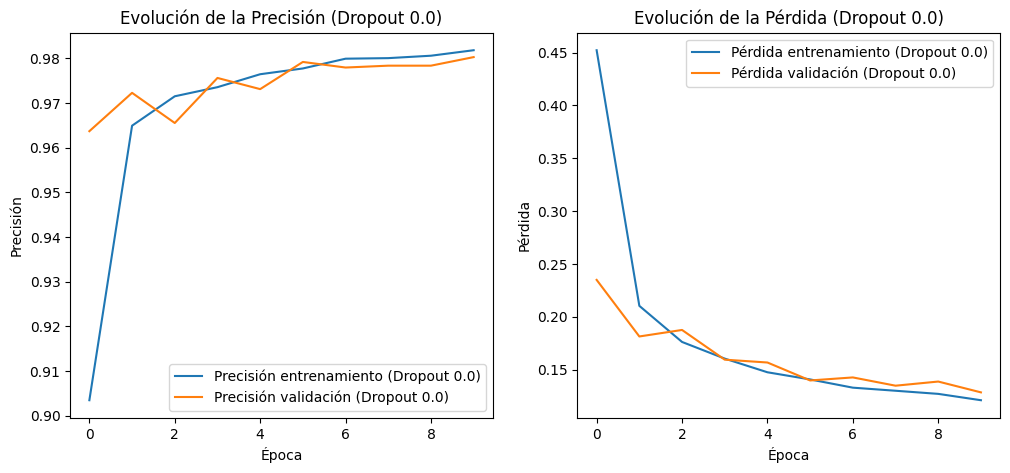

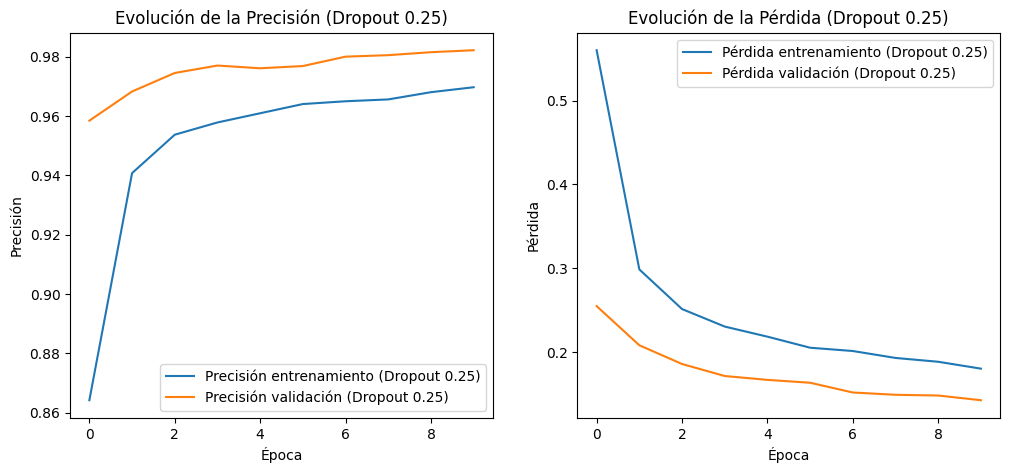

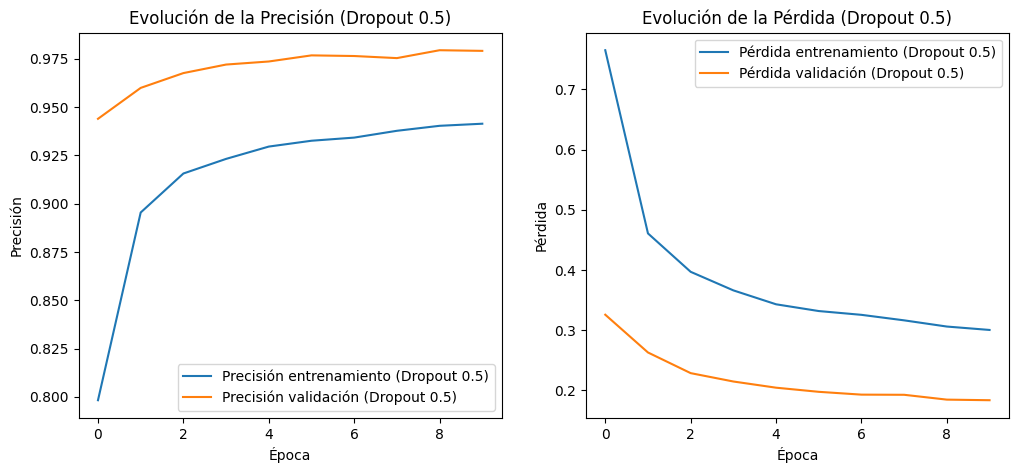

In [9]:
dropout_rates = [0.0, 0.25, 0.5]

# Graficamos las curvas de precisión y pérdida para cada tasa de dropout
for dropout_rate in dropout_rates:
    model = create_lighter_model(dropout_rate=dropout_rate)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label=f'Precisión entrenamiento (Dropout {dropout_rate})')
    plt.plot(history.history['val_accuracy'], label=f'Precisión validación (Dropout {dropout_rate})')
    plt.title(f'Evolución de la Precisión (Dropout {dropout_rate})')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label=f'Pérdida entrenamiento (Dropout {dropout_rate})')
    plt.plot(history.history['val_loss'], label=f'Pérdida validación (Dropout {dropout_rate})')
    plt.title(f'Evolución de la Pérdida (Dropout {dropout_rate})')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()


Con dropout (0.25 y 0.5): El modelo puede mejorar su capacidad de generalización, pero a costa de perder algo de precisión en el conjunto de entrenamiento. En general, hay un comportamiento más equilibrado entre la precisión de entrenamiento y validación. Sin dropuot probablemente se vea un overfitting más evidente, con una gran diferencia entre la precisión de entrenamiento y validación

----------

Variar el factor de regularización L2
Qué hacer:

Modifica el parámetro l2_reg en la función create_lighter_model utilizando valores como 0.0, 0.001 y 0.01.

Vuelve a entrenar el modelo con cada valor y registra las métricas de rendimiento (precisión, recall, F1-score y AUC-ROC).
Discute cuál configuración mejora la capacidad de generalización del modelo y cómo se comporta la curva de pérdida.

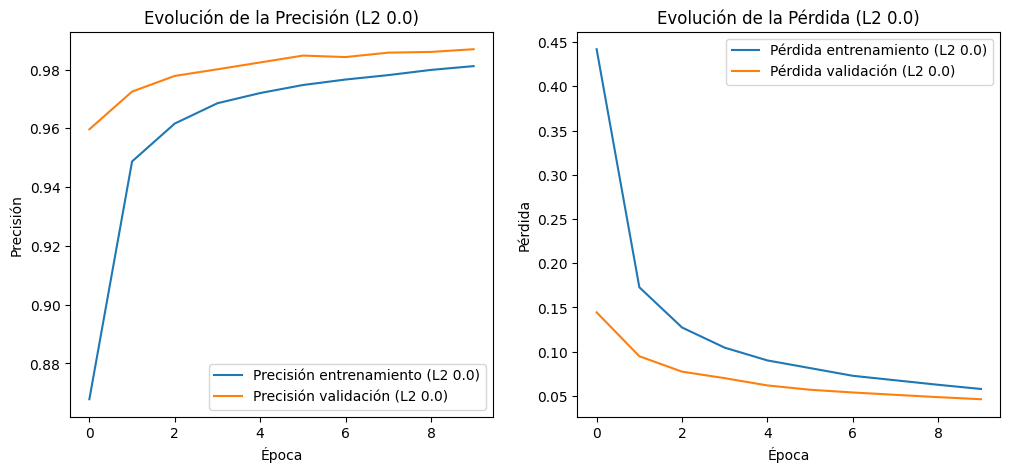

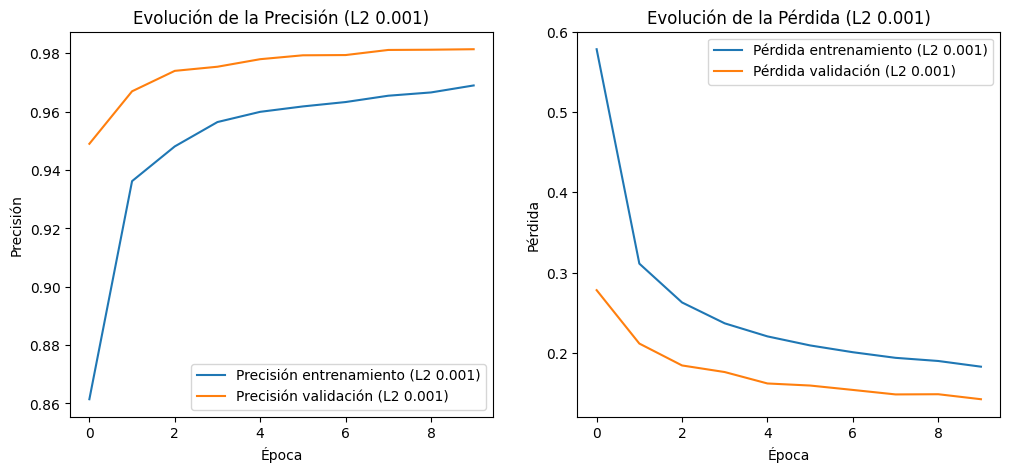

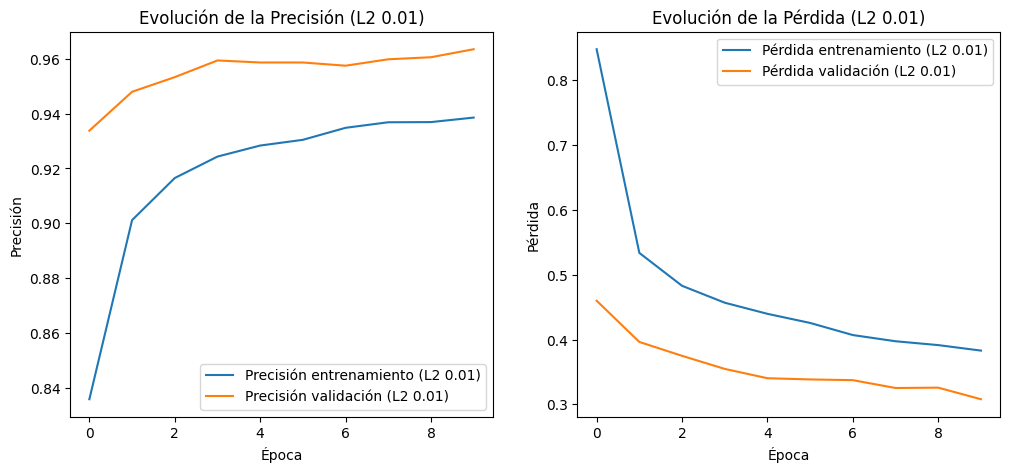

In [10]:
l2_regs = [0.0, 0.001, 0.01]

# Graficamos las curvas de precisión y pérdida para cada valor de L2
for l2_reg in l2_regs:
    model = create_lighter_model(l2_reg=l2_reg)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label=f'Precisión entrenamiento (L2 {l2_reg})')
    plt.plot(history.history['val_accuracy'], label=f'Precisión validación (L2 {l2_reg})')
    plt.title(f'Evolución de la Precisión (L2 {l2_reg})')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label=f'Pérdida entrenamiento (L2 {l2_reg})')
    plt.plot(history.history['val_loss'], label=f'Pérdida validación (L2 {l2_reg})')
    plt.title(f'Evolución de la Pérdida (L2 {l2_reg})')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()


Con L2 regularización (L2 0.001 y 0.01): Estos valores deberían ayudar a reducir el overfitting y mejorar la capacidad de generalización del modelo. A medida que el valor de L2 aumente, el modelo se volverá más regularizado, lo que puede hacer que pierda algo de precisión, pero ganará en estabilidad y generalización. Sin regularización El modelo probablemente presentará un mayor riesgo de overfitting, lo que se reflejará en una gran diferencia entre la precisión de entrenamiento y validación

-------------------------

Ajustar el número de filtros en la capa convolucional
Qué hacer:

Cambia el número de filtros en la primera capa convolucional (por ejemplo, prueba con 8, 16 y 32 filtros).

Ejecuta el entrenamiento para cada configuración y anota los tiempos de entrenamiento y las métricas de rendimiento obtenidas.

Analiza el impacto en la complejidad del modelo y si un menor número de filtros se traduce en una pérdida significativa de precisión o mejora en velocidad de entrenamiento.

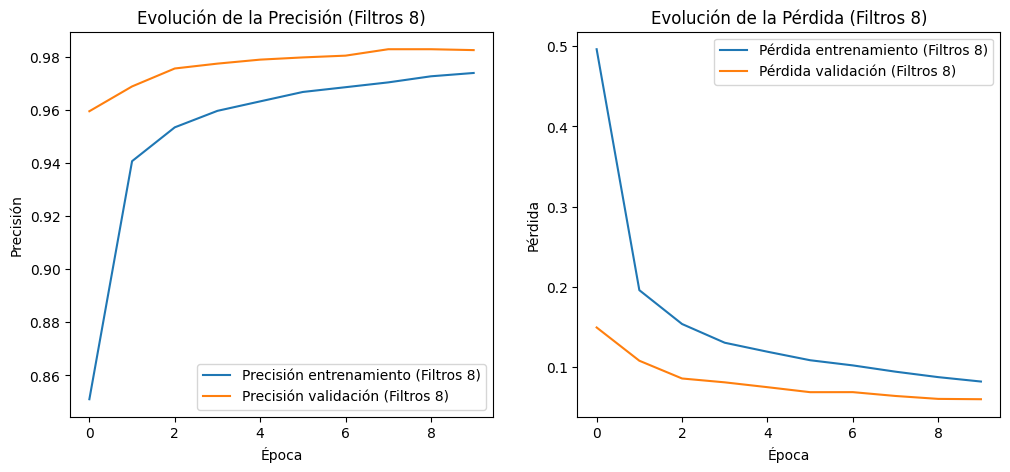

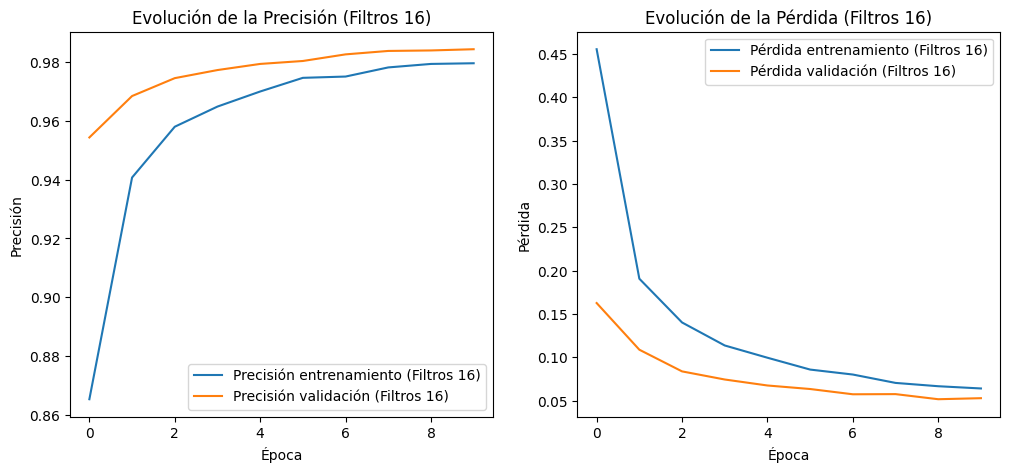

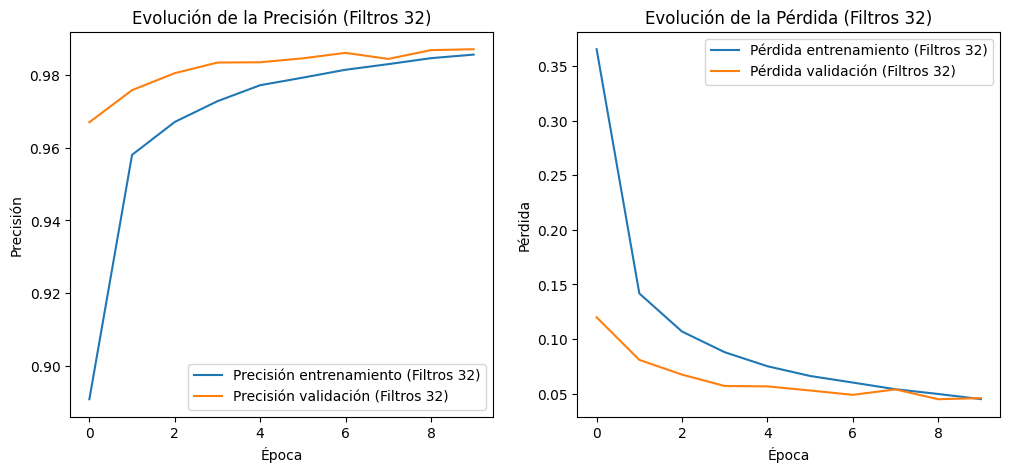

In [11]:
filter_counts = [8, 16, 32]

# Graficamos las curvas de precisión y pérdida para diferentes números de filtros
for filters in filter_counts:
    model = models.Sequential()
    # Capa convolucional con diferente cantidad de filtros
    model.add(layers.Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Aplanar y capa densa
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.25))

    # Capa de salida
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label=f'Precisión entrenamiento (Filtros {filters})')
    plt.plot(history.history['val_accuracy'], label=f'Precisión validación (Filtros {filters})')
    plt.title(f'Evolución de la Precisión (Filtros {filters})')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label=f'Pérdida entrenamiento (Filtros {filters})')
    plt.plot(history.history['val_loss'], label=f'Pérdida validación (Filtros {filters})')
    plt.title(f'Evolución de la Pérdida (Filtros {filters})')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()


Filtros altos (32): El modelo tendrá más capacidad de aprender características complejas, pero también será más propenso a sobreajustarse y tomará más tiempo para entrenarse. Con filtros bajos el modelo tendrá menos capacidad para aprender características complejas de las imágenes, lo que puede hacer que el rendimiento sea más bajo.